<a href="https://colab.research.google.com/github/Trodenn/Lboro_Ai_principles_group_project/blob/main/GroupPres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)

# we want to impute with KNN
imputer = KNNImputer(n_neighbors=5)
data[columns_to_replace] = imputer.fit_transform(data[columns_to_replace])
data










,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,34.4,166.2,37.5,0.197,26.0,0
759,6,190.0,92.0,26.0,227.0,35.5,0.278,66.0,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0
761,9,170.0,74.0,31.0,212.0,44.0,0.403,43.0,1
762,9,89.0,62.0,20.2,43.0,22.5,0.142,33.0,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1
767,1,93.0,70.0,31.0,66.6,30.4,0.315,23.0,0


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1
767,1,93.0,70.0,31.0,66.6,30.4,0.315,23.0,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.601562,72.325781,29.096615,152.724479,32.434479,0.471876,33.240885,0.348958
std,3.369578,30.494403,12.193908,9.424697,98.502206,6.883819,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.450000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,131.600000,32.190000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
duplicates = data.duplicated()
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.drop_duplicates(inplace=True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.60,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.60,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.30,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.10,2.288,33.0,1
5,5,116.0,74.0,20.2,98.0,25.60,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.00,0.248,26.0,1
7,10,115.0,68.4,28.6,123.2,35.30,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.50,0.158,53.0,1
9,8,125.0,96.0,26.4,165.8,34.92,0.232,54.0,1


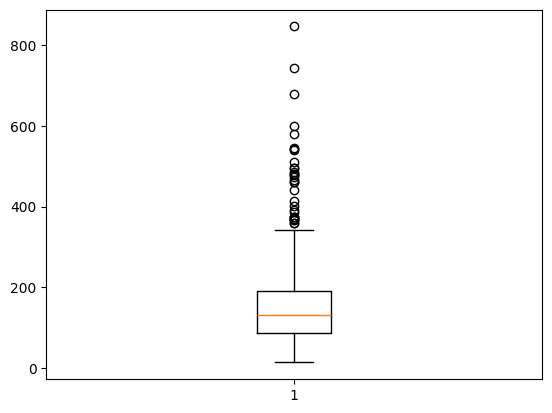

In [ ]:
#using boxplot to visulize outliers for all features except Outcome
plt.boxplot(data['Insulin'])
plt.show()



In [ ]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Insulin'] >= lower_bound) & (data['Insulin'] <= upper_bound)]

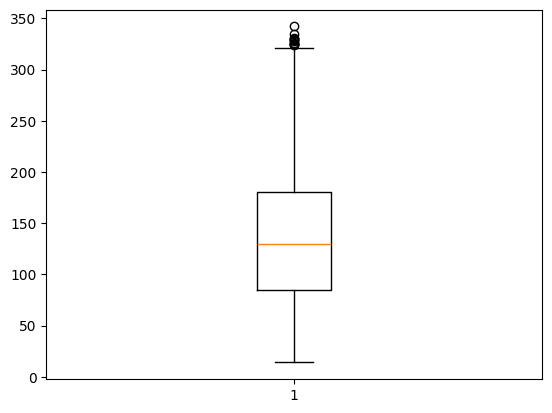

In [ ]:
plt.boxplot(data['Insulin'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Insulin'] = scaler.fit_transform(data[['Insulin']])

<ipython-input-44-d5b895e074f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Insulin'] = scaler.fit_transform(data[['Insulin']])


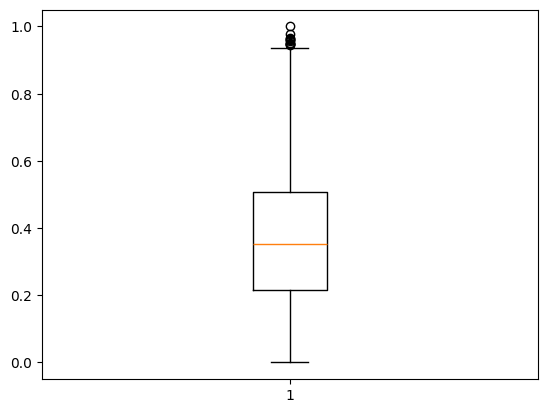

In [ ]:
plt.boxplot(data['Insulin'])
plt.show()

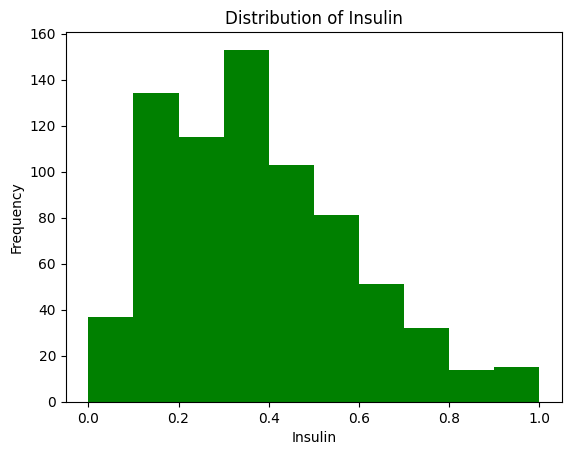

In [ ]:
plt.hist(data['Insulin'], color='g')
plt.xlabel('Insulin')

plt.ylabel('Frequency')

plt.title('Distribution of Insulin')

plt.show()

In [ ]:
data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               735 non-null    int64  
 1   Glucose                   735 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             735 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       735 non-null    float64
 6   DiabetesPedigreeFunction  735 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   735 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 57.4 KB


In [ ]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.853389,118.983402,72.300415,28.776487,0.368999,32.246169,0.464076,33.207469,0.331950
std,3.387785,28.865618,12.239391,9.271536,0.195429,6.835594,0.316747,11.656848,0.471239
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.700000,0.210366,27.400000,0.241500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.000000,0.347561,32.000000,0.366000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,34.300000,0.499085,36.300000,0.613500,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,0.935976,67.100000,2.420000,81.000000,1.000000
